<a href="https://colab.research.google.com/github/tsugg/Sticky-Notes/blob/master/sticky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the model to the files tab

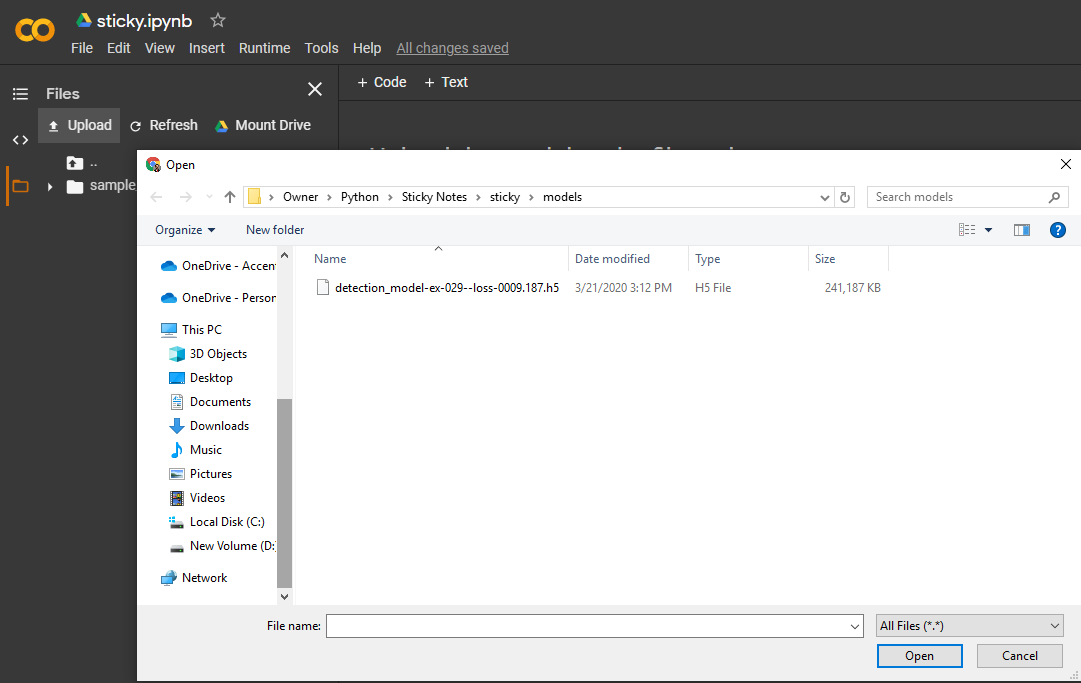

If at some point you need to delete a directory, run this code...

%%bash \
sudo rm -R /path/to/directory

# Install packages

In [0]:
%%capture
!pip3 install imageai --upgrade
!pip install keras-ocr

# Clone my Github repository

In [2]:
!git clone https://github.com/tsugg/Sticky-Notes.git

Cloning into 'Sticky-Notes'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 59 (delta 23), reused 59 (delta 23), pack-reused 0
Unpacking objects: 100% (59/59), done.


# Run the cell below and chose all images you want to import

In [20]:
from google.colab import files

uploaded = files.upload()

Saving IMG_7344.jpg to IMG_7344.jpg


# Use glob to assort the images numerically. 

Shout out to the most recent computer vision training for this code

In [0]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [21]:
import glob

images = sorted(glob.glob('/content/*.jpg'), key=numericalSort)
images

['/content/IMG_7344.jpg']

# Make an output directory to store sticky note isolated images and text files

In [0]:
from imageai.Detection.Custom import CustomObjectDetection
from imageai.Detection.Custom import DetectionModelTrainer
from PIL import Image
import os 

os.mkdir('/content/output/')

# By this step, your working directory should look like this

The number of images you have is dependent upon how many you selected in cell 3

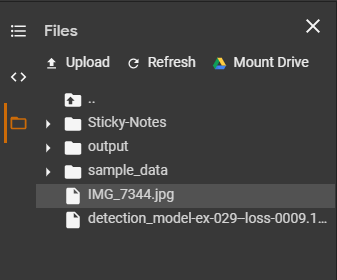

# Perform object detection and save new images in output directory

In [0]:
for image in images:

  image_path = image
  image_name = image_path.split('/')[2]
  picture_name = image_name.split('.')[0]
  output_path = '/content/output/'
  os.mkdir(output_path+picture_name)

  detector = CustomObjectDetection()
  detector.setModelTypeAsYOLOv3()
  detector.setModelPath("/content/detection_model-ex-029--loss-0009.187.h5") 
  detector.setJsonPath("/content/Sticky-Notes/logs/detection_config.json")
  detector.loadModel()
  returned_image, detections = detector.detectObjectsFromImage(input_image=image_path, output_type = 'array', minimum_percentage_probability=30)

  box_points = []
  for x, detection in enumerate(detections):
    points = tuple(detection["box_points"])
    box_points.append(points)

  for x, box in enumerate(box_points):
    x1 = box[0]
    y1 = box[1]
    x2 = box[2]
    y2 = box[3]
    crop = returned_image[y1:y2, x1:x2, :]
    im = Image.fromarray(crop)
    im.save(output_path+picture_name+'/'+str(x)+'.jpg')

# The cropped images have just been added to the output directory

# Optical Character Recognition

In [23]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

subdir = sorted(glob.glob('/content/output/*'), key=numericalSort)
for directory in subdir:
  dirname = directory.split('/')[3]
  images = sorted(glob.glob('/content/output/'+dirname+'/*.jpg'), key=numericalSort)
  prediction_groups = pipeline.recognize(images)
  for i in range(len(prediction_groups)):
    text_list = []
    group = prediction_groups[i]
    for g in group:
      text = g[0]
      text_list.append(text)
    save_name = '/content/output/'+dirname+'/'+str(i)+'.txt'
    f = open(save_name,'w')
    for ele in text_list:
      f.write(ele+'\n')
    f.close()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


# The text files have been added to the corresponding output directories

## If you double click on the matching .jpg and .txt, you should see something like this...

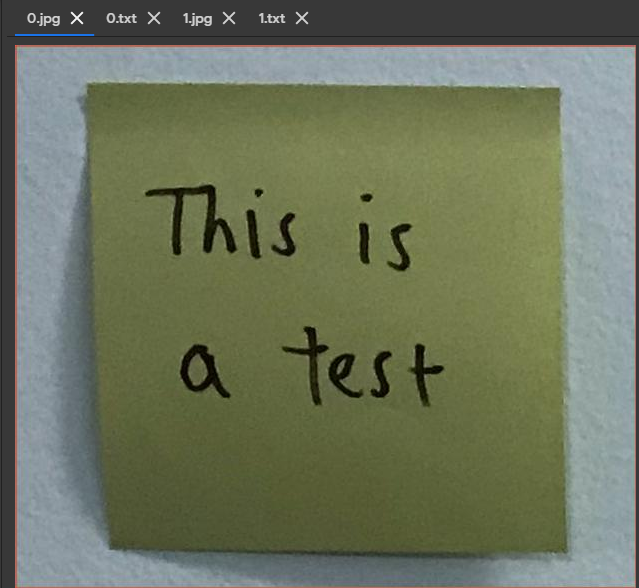



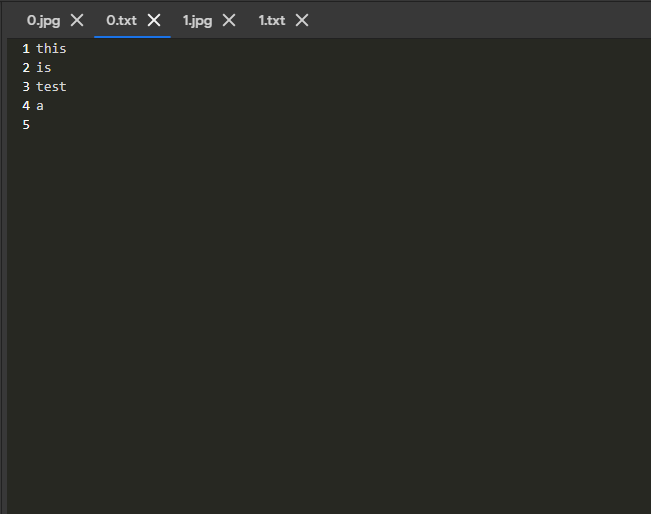